# Trust region method
Loading python libraries

In [1]:
# Numerical python library, importing all
import numpy as np

# Scientific computing python library, importing linalg sections
from scipy import linalg

# Plotting library
from matplotlib import pyplot as mp

## Dogleg method
Implementation of the dogleg method, taking into account the constraint $\|p_k\| \leq \Delta_k$ for every $k \in \mathbb{N}$

In [2]:
def dogleg_method( f, g, B, delta ) :
  
  pu = -( g.T.dot( g ) / ( g.T.dot( B.dot( g ) ) ) ) * g
  pb = -linalg.solve( B, g )
  npb = linalg.norm( pb ) 
  
  if npb > delta :
    tau = delta / npb
    p = tau * pb
  else :
    a = linalg.norm( pb - pu )**2
    b = pu.T.dot( pb - pu )
    c = linalg.norm( pu )**2 - delta**2
    tau = ( 2.0 * a - b + np.sqrt( b**2 - 4.0 * a * c ) ) / ( 2.0 * a )
    p = pu + ( tau - 1 ) * ( pb - pu )  
    
  return ( p, tau )

## Trust region of algorithm
Algorithm (4.1) for trust region method

In [3]:
def trust_region_method( x0, f, g, h, app_meth, delta, eta, eps, ite ) :
 
  # Intialization
  x = x0
  
  fx0 = f( x0 )
  fx = fx0
  
  gx0 = g( x0 )  
  gx = gx0
  p = gx
  
  Bx0 = h( x0 )
  Bx = Bx0
  
  mx0 = fx
  mx = fx0 + gx.T.dot( p ) + 0.5 * p.T.dot( Bx.dot( p ) )
  rho = 1
   
  e = 2 * eps
  ev = []
  dk = delta
  k = 0
  while k < ite and e > eps :
    
    # Approximation of p
    p, tau = app_meth( fx, gx, Bx, dk )
    
    # Evaluation of rho
    mx0 = mx
    mx = fx + gx.T.dot( p ) + 0.5 * p.T.dot( Bx.dot( p ) )
    
    if mx0 > mx :
        rho = ( fx0 - f( x + p ) ) / ( mx0 - mx )
    else:
        rho = ( fx0 - f( x + p ) ) / 1e-10
    
    # Algorithm for trust region
    if rho < 0.25 :
      dk = 0.25 * dk
    else :
      if rho > 0.75 and linalg.norm( p ) == dk :
        dk = min( 2 * dk, delta )

    if rho > eta :
      x0 = x
      x = x + p
    else :
      x0 = x 

    # Updating values
    fx0 = fx
    fx = f( x )
    
    gx0 = gx
    gx = g( x )
    
    Bx0 = Bx
    Bx = h( x )
        
    e = linalg.norm( gx ) 
    ev.append( e )
    k = k + 1
    
  return ( x, fx, gx, Bx, k, ev )

## Example with the Rosenbrock function
The Rosenbrock function $f : \mathbb{R}^2 \longrightarrow \mathbb{R}$ is defined by:
\begin{equation}
f(x,y) = 100 ( y - x^2 )^2 + ( 1 - x )^2
\end{equation}

In [4]:
def f( x ) :
  f = 100 * ( x[1] - x[0]**2 )**2 + ( 1 - x[0] )**2
  return f

the gradient of $f$ is given by
\begin{equation}
\nabla f(x,y) 
= \left[
\begin{array}{c}
400 x^3 - 400 x y + 2x - 2 \\
200 ( y - x^2 )
\end{array}
\right]
\end{equation}

In [5]:
def g( x ) :
  gf = np.array( [ 400 * x[0]**3 - 400 * x[0] * x[1] + 2 * x[0] - 2, 200 * ( x[1] - x[0]**2 ) ] )
  gf = gf.T
  return gf

and the Hessian of $f$
\begin{equation}
\nabla^2 f(x,y) 
= \left[
\begin{array}{cc}
 1200x^2 - 400y + 2 & -400x \\
 -400x & 200
\end{array}
\right]
\end{equation}

In [6]:
def h( x ) :
  B = np.zeros( ( 2, 2 ) )
  B[ 0, 0 ] = 2.0 - 400.0 * x[1] + 1200.0 * x[0]**2
  B[ 0, 1 ] = -400.0 * x[0]
  B[ 1, 0 ] = -400.0 * x[0]
  B[ 1, 1 ] = 200.0
  return B

Iteration starting at point $(x_0,y_0) = (1.2, 1.2)$

In [7]:
ite = 1000
eps = 1e-12
delta = 0.05
eta = 1e-20
x0 = np.array( [ 1.2, 1.2 ] )
S = trust_region_method( x0, f, g, h, dogleg_method, delta, eta, eps, ite )
print( 'Optimal point:', S[0] )
print( 'Objective function value:', S[1] )
print( 'Gradient at optimal point:', S[2] )
print( 'Last Hessian approximation:\n', S[3] )
print( 'Iterations:', S[4], '\n' )

Optimal point: [1. 1.]
Objective function value: 1.283948653483038e-25
Gradient at optimal point: [ 2.30926389e-14 -3.77475828e-13]
Last Hessian approximation:
 [[ 802. -400.]
 [-400.  200.]]
Iterations: 107 



Plotting error in logarithmic scale, $\varepsilon_k = \|g_k\|, \forall k \in \mathbb{N}$

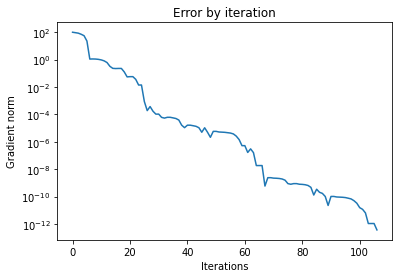

In [8]:
mp.xlabel( 'Iterations' )
mp.ylabel( 'Gradient norm' )
mp.title( 'Error by iteration' )
mp.yscale( 'log' )
mp.plot( S[5] )

Iteration starting at point $(x_0,y_0) = (-1.2, 1.1)$

In [9]:
ite = 1000
eps = 1e-12
delta = 0.3
eta = 1e-20
x0 = np.array( [ -1.2, 1.1 ] )
S = trust_region_method( x0, f, g, h, dogleg_method, delta, eta, eps, ite )
print( 'Optimal point:', S[0] )
print( 'Objective function value:', S[1] )
print( 'Gradient at optimal point:', S[2] )
print( 'Last Hessian approximation:\n', S[3] )
print( 'Iterations:', S[4], '\n' )

Optimal point: [1. 1.]
Objective function value: 5.667886717922448e-26
Gradient at optimal point: [3.05533376e-13 8.88178420e-14]
Last Hessian approximation:
 [[ 802. -400.]
 [-400.  200.]]
Iterations: 102 



Plotting error in logarithmic scale, $\varepsilon_k = \|g_k\|, \forall k \in \mathbb{N}$

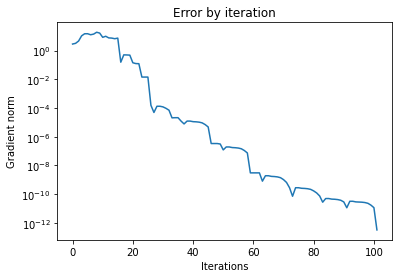

In [10]:
mp.xlabel( 'Iterations' )
mp.ylabel( 'Gradient norm' )
mp.title( 'Error by iteration' )
mp.yscale( 'log' )
mp.plot( S[5] )